In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

# Load Data

In [5]:
df_customers = pd.read_csv("../data/raw/customers.csv")
df_loans = pd.read_csv("../data/raw/loans.csv")
df_bureau = pd.read_csv("../data/raw/bureau_data.csv")

In [6]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [7]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [9]:
df = pd.merge(df_customers, df_loans, on='cust_id')

In [10]:
df = pd.merge(df, df_bureau, on='cust_id')

In [11]:
# check that you have all the information and understand the general structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [12]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,False
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,False
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,False
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,False
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,False


# Data Cleaning: Handling Missing and Duplicate Values

In [14]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [17]:
# We don't see the tests data and fill up na values in accordance with the train data set
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)

/var/folders/bl/03dn4k0933q6q1tsklj_xsyr0000gn/T/ipykernel_17342/3573807240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
/var/folders/bl/03dn4k0933q6q1tsklj_xsyr0000gn/T/ipykernel_17342/3573807240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [18]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
# Handle duplicate values
df_train.duplicated().sum()

np.int64(0)

In [20]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [21]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.56,2636054.83,1.94,15.99,418768.57,4706706.56,4002796.64,80724.11,720503.40,3202237.31,25.90,1336077.19,987467.44,2.50,1.00,76.00,4.89,26.94,5.00,43.33
std,9.85,2624140.92,1.54,8.94,168831.82,6288692.94,5400902.41,120830.65,972162.43,4320721.92,12.42,1213733.93,1045108.58,1.12,0.82,43.71,5.86,32.93,2.02,29.36
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,6.00,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1136000.00,959000.00,19180.00,172620.00,767200.00,16.00,423931.00,286189.50,1.00,0.00,42.00,0.00,0.00,4.00,18.00
50%,40.00,1884000.00,2.00,16.00,400001.00,2651000.00,2234000.00,44700.00,402120.00,1787200.00,24.00,1000881.50,666825.00,2.00,1.00,71.00,3.00,14.00,5.00,39.00
75%,46.00,3332000.00,3.00,24.00,560001.00,5159000.00,4597250.00,92000.00,827505.00,3677800.00,35.00,1789091.75,1236740.50,3.00,2.00,107.00,9.00,46.00,6.00,67.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47667000.00,5698029.90,8580060.00,38133600.00,59.00,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00


In [41]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement',
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city',
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

# Visualize Outliers

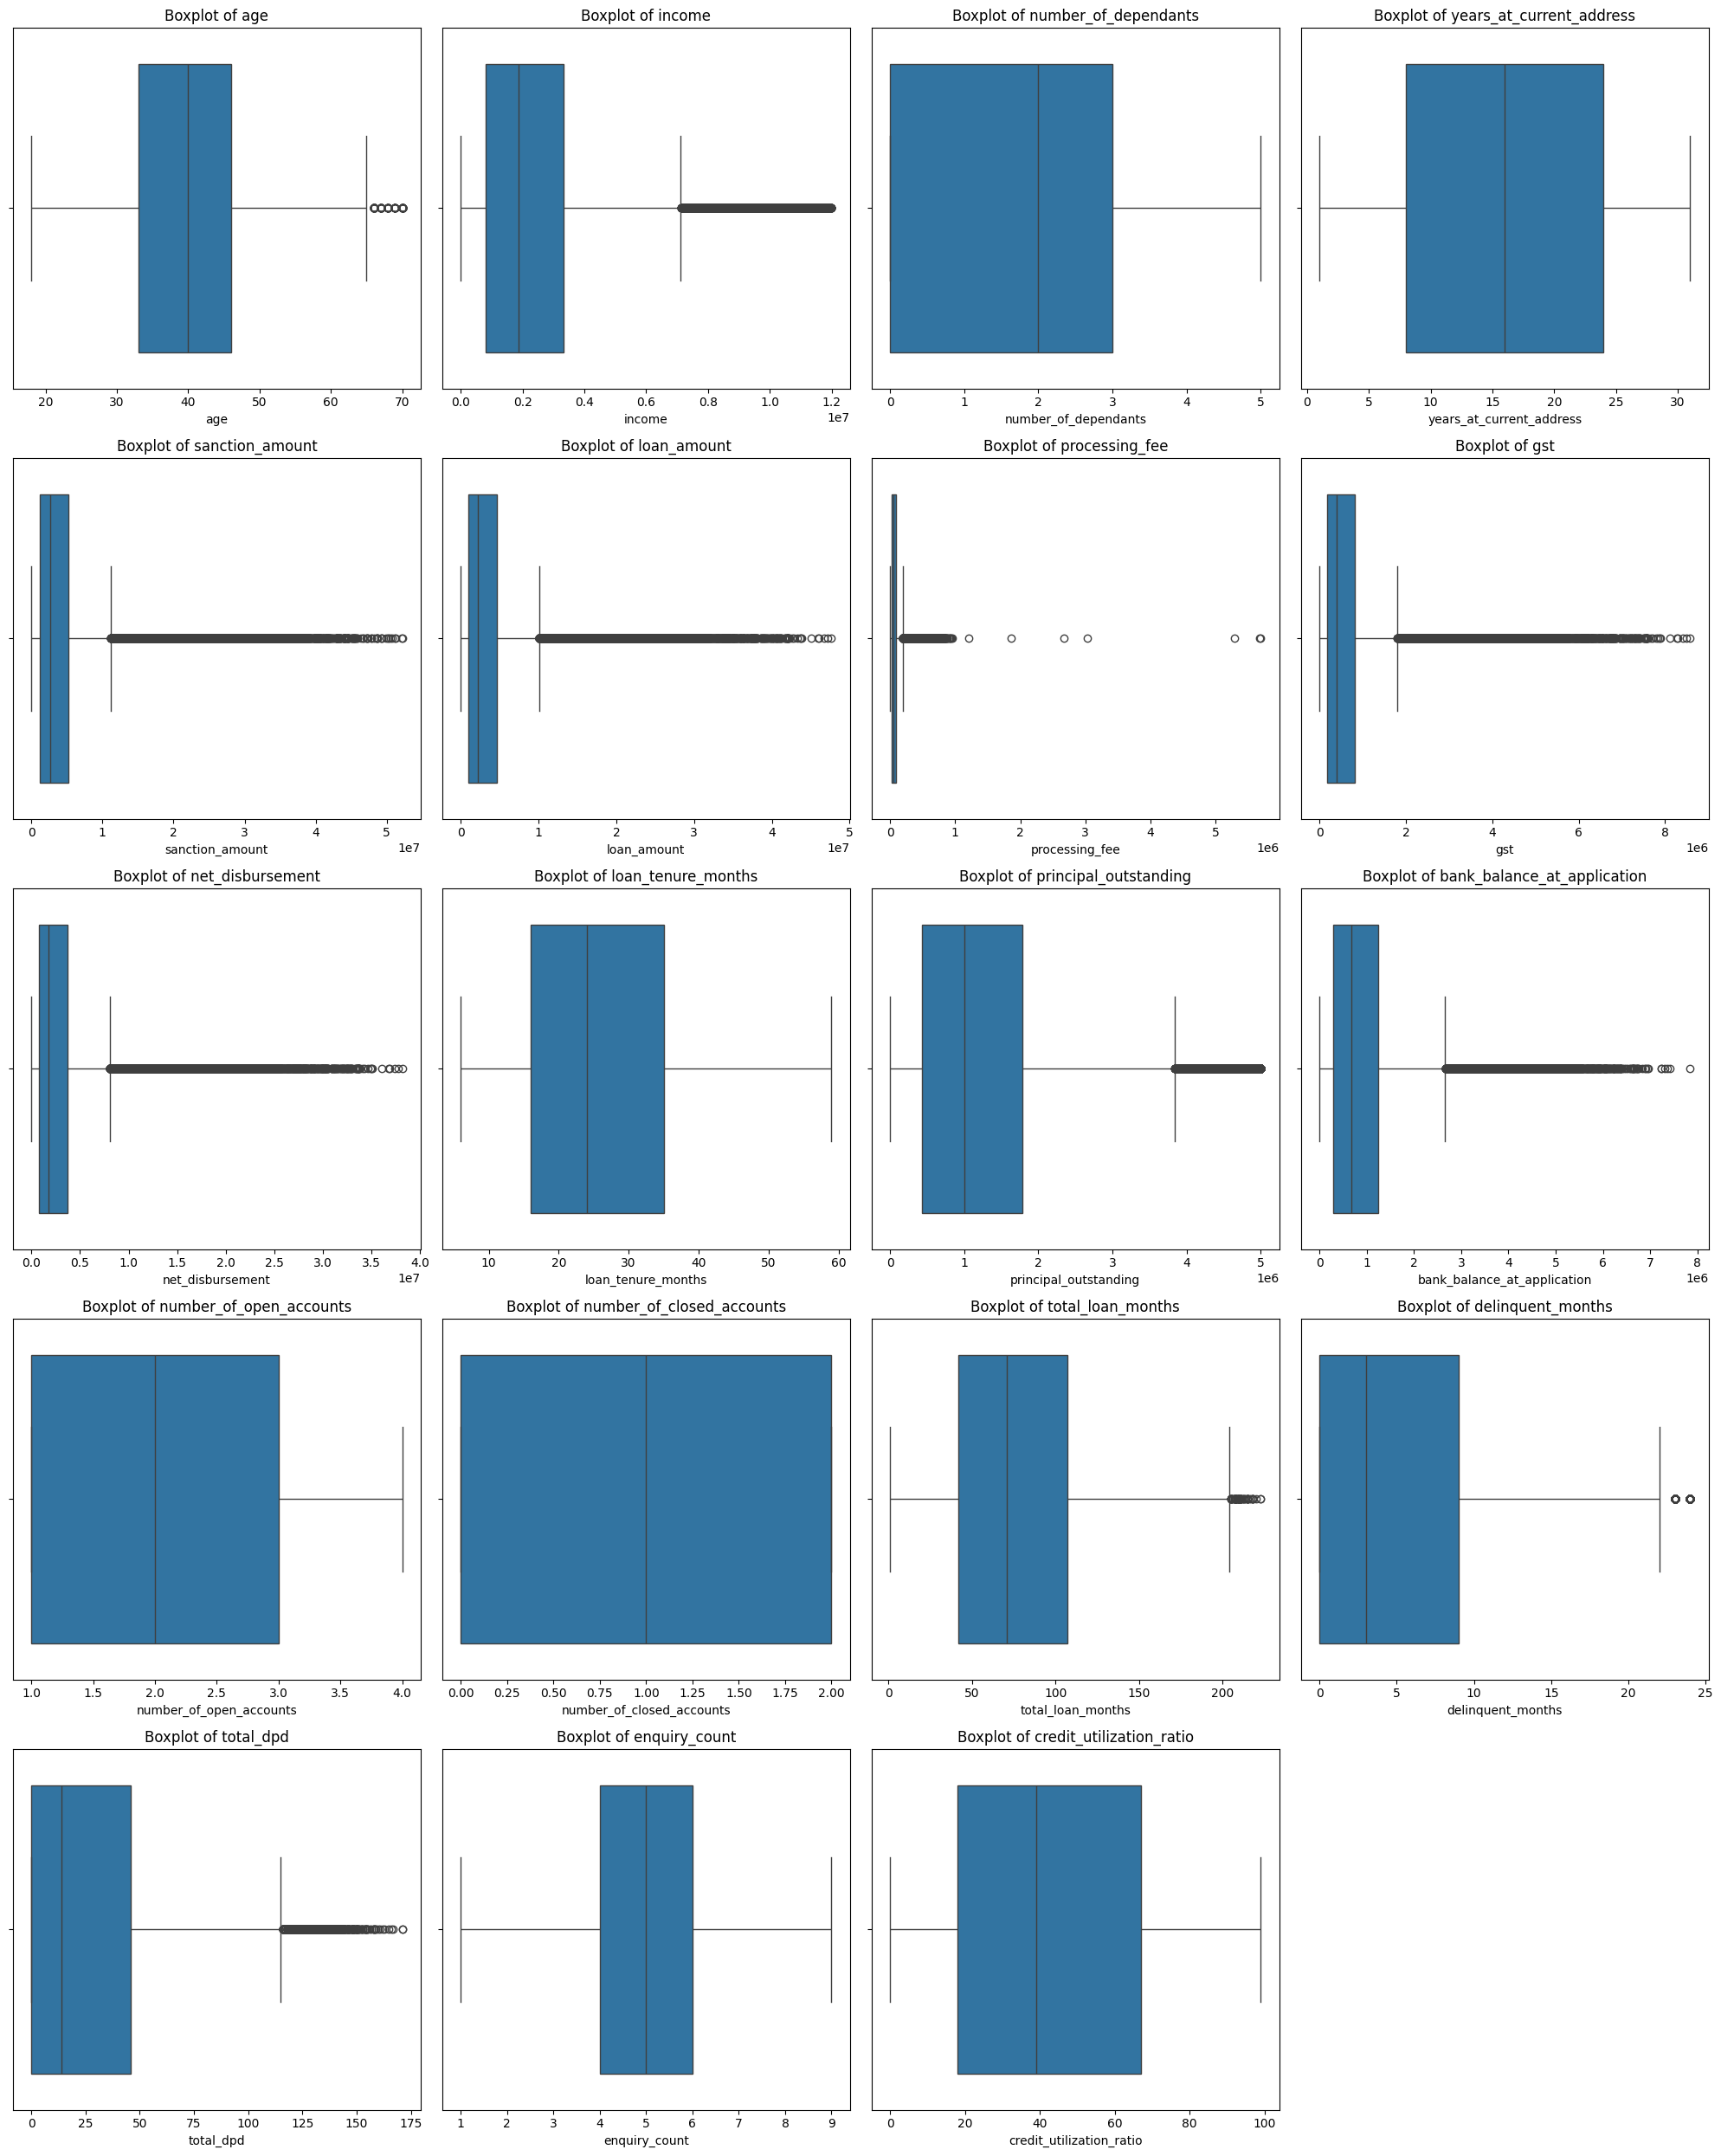

In [43]:
n_cols = 4
n_total = len(columns_continuous)
n_rows = (n_total + n_cols - 1) // n_cols  # ceiling without math

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.boxplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

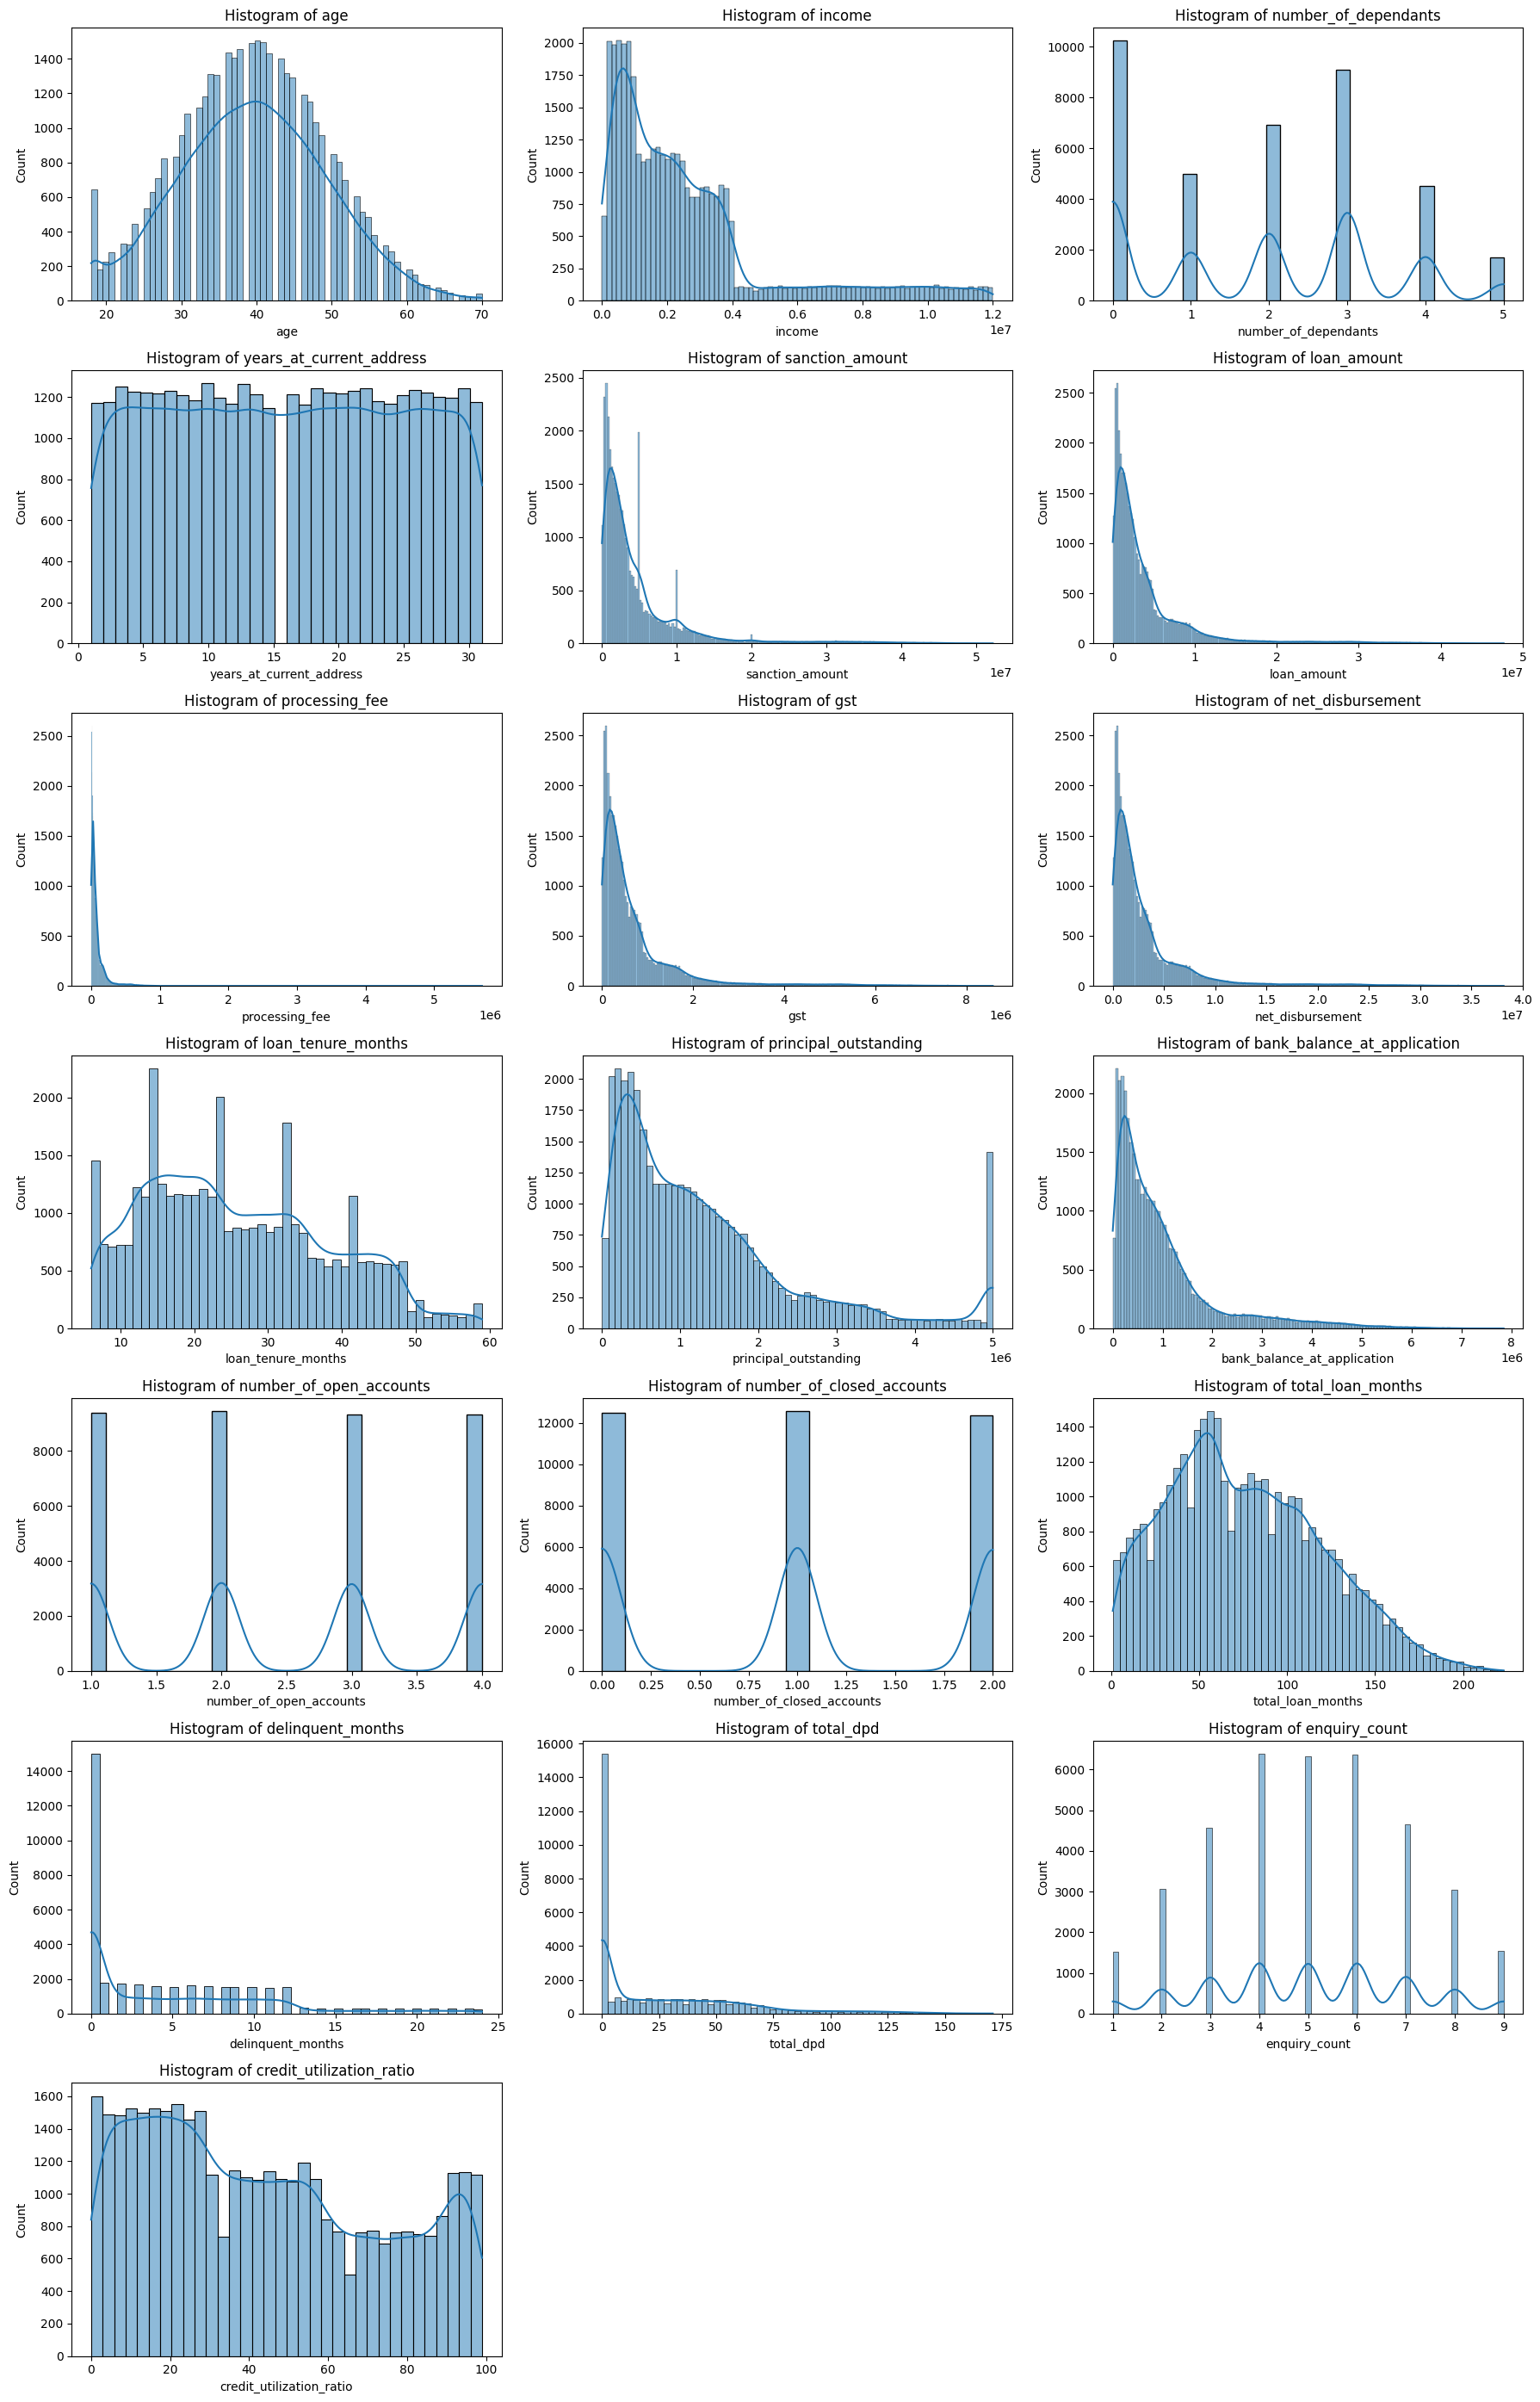

In [44]:
n_cols = 3
n_total = len(columns_continuous)
n_rows = (n_total + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_continuous):
    sns.histplot(data=df_train, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Variable Distribution & Outlier Analysis

As part of the data exploration for our credit risk model, we performed a comprehensive analysis of all continuous numerical variables using boxplots and histograms to identify the shape of each distribution and spot potential outliers.

## Key Observations

### 1. Expected Skewness & Outliers
Many financial variables are right-skewed, which aligns with domain expectations:
- Loan amounts, sanctioned amounts, net disbursement, and principal outstanding naturally have long tails — most borrowers take moderate loans, but a few take very large ones.
- Income and bank balance at application also follow this pattern.

These skewed distributions come with visible outliers, but they are likely valid due to the inherent variance in customer financial profiles.

### 2. Expected Relationships Confirmed
Some variable relationships appear logically consistent:
- Higher loan amounts generally correlate with higher sanctioned amounts, principal outstanding, and net disbursement.
- Delinquent months and total DPD (Days Past Due) mostly concentrate near zero, indicating that most borrowers are timely, with a minority being chronic defaulters.

### 3. Suspicious or Illogical Patterns
However, we also identified some inconsistencies that warrant deeper investigation:

#### Processing Fees
- Processing fee should scale with loan amount, yet its distribution is oddly symmetric and centralized, unlike the strongly right-skewed loan amount distribution.
- This suggests that many high processing fees do not correspond to high loan amounts, breaking a domain expectation.
- Likely cause: data entry errors, fixed-fee entries, or erroneous scale (e.g., ₹100k instead of ₹10k).

Actionable: These entries should be flagged and validated against the corresponding loan amounts. Consider removing or imputing based on loan tiers.

### Final Thoughts
While many of the outliers are valid, certain variables — especially those not aligning with natural relationships (like `processing_fee`) — raise red flags. Cleaning these will directly improve model robustness, interpretability, and risk predictiveness.

We recommend incorporating these findings into the next phase of data validation, feature engineering, and business rule alignment.



In [46]:
# From business perspective, we can remove outliers from the processing fee
# We know processing fees are capped at 3% of the loan amount

# analyze rows where the processing fee is more than 3% of the loan amount
df_train[df_train.processing_fee/df_train.loan_amount > 0.03].head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,False
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,False
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,False
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,False
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,False


In [50]:
# we can remove these rows from the training and test set because there are very few records that are wierd like this
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount <= 0.03].copy()
df_test_1 = df_test[df_test.processing_fee/df_test.loan_amount <= 0.03].copy()

In [49]:
df_train_1.shape, df_test_1.shape

((37487, 33), (12498, 33))

In [52]:
# analyze categorical variables
for col in columns_categorical:
    print(f"{col} -->", df_train_1[col].unique())

gender --> ['F' 'M']
marital_status --> ['Single' 'Married']
employment_status --> ['Salaried' 'Self-Employed']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state --> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode --> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose --> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [False  True]


In [53]:
# Replace the odd values in the categorical variables
df_train_1["loan_purpose"] = df_train_1["loan_purpose"].replace({"Personaal": "Personal"})
df_test_1["loan_purpose"] = df_test_1["loan_purpose"].replace({"Personaal": "Personal"})

In [54]:
print(f"loan_purpose -->", df_train_1["loan_purpose"].unique())

loan_purpose --> ['Home' 'Auto' 'Personal' 'Education']


# Exploratory Data Analysis (EDA)